Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression


#### Reading daily data spreadsheet

In [2]:
cases = pd.read_csv('data/semanal_2015.csv', index_col=0)
cases

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
semana_epi,,,,,,,,,,,,,,,,,,,,,
1,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2.0,2.0,0.0,1.0,0.0,2.0,7.0,2.0,1.0,3.0,...,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0
5,7.0,7.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,...,0.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
6,8.0,6.0,6.0,8.0,2.0,0.0,2.0,1.0,2.0,4.0,...,0.0,3.0,5.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0
7,26.0,7.0,24.0,27.0,1.0,1.0,6.0,2.0,11.0,4.0,...,0.0,0.0,4.0,6.0,2.0,1.0,1.0,0.0,1.0,0.0
8,20.0,25.0,22.0,26.0,6.0,3.0,7.0,7.0,9.0,4.0,...,0.0,11.0,2.0,15.0,0.0,2.0,3.0,0.0,0.0,2.0
9,41.0,17.0,35.0,26.0,5.0,4.0,5.0,13.0,27.0,12.0,...,0.0,16.0,9.0,19.0,6.0,3.0,1.0,0.0,1.0,1.0


In [4]:
print(cases.index)
start_date = '2015-01-04' 
date_rng = pd.date_range(start=start_date, periods=len(cases), freq='W')
cases.index = date_rng
cases

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
      dtype='int64', name='semana_epi')


,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
2015-01-04,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0
2015-01-11,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0
2015-01-18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0
2015-01-25,2.0,2.0,0.0,1.0,0.0,2.0,7.0,2.0,1.0,3.0,...,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0
2015-02-01,7.0,7.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,...,0.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-02-08,8.0,6.0,6.0,8.0,2.0,0.0,2.0,1.0,2.0,4.0,...,0.0,3.0,5.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0
2015-02-15,26.0,7.0,24.0,27.0,1.0,1.0,6.0,2.0,11.0,4.0,...,0.0,0.0,4.0,6.0,2.0,1.0,1.0,0.0,1.0,0.0
2015-02-22,20.0,25.0,22.0,26.0,6.0,3.0,7.0,7.0,9.0,4.0,...,0.0,11.0,2.0,15.0,0.0,2.0,3.0,0.0,0.0,2.0
2015-03-01,41.0,17.0,35.0,26.0,5.0,4.0,5.0,13.0,27.0,12.0,...,0.0,16.0,9.0,19.0,6.0,3.0,1.0,0.0,1.0,1.0
2015-03-08,48.0,28.0,51.0,53.0,10.0,3.0,10.0,11.0,25.0,14.0,...,1.0,21.0,25.0,28.0,2.0,0.0,6.0,0.0,0.0,1.0


#### Plotting the Percentage of Zeros per TZs

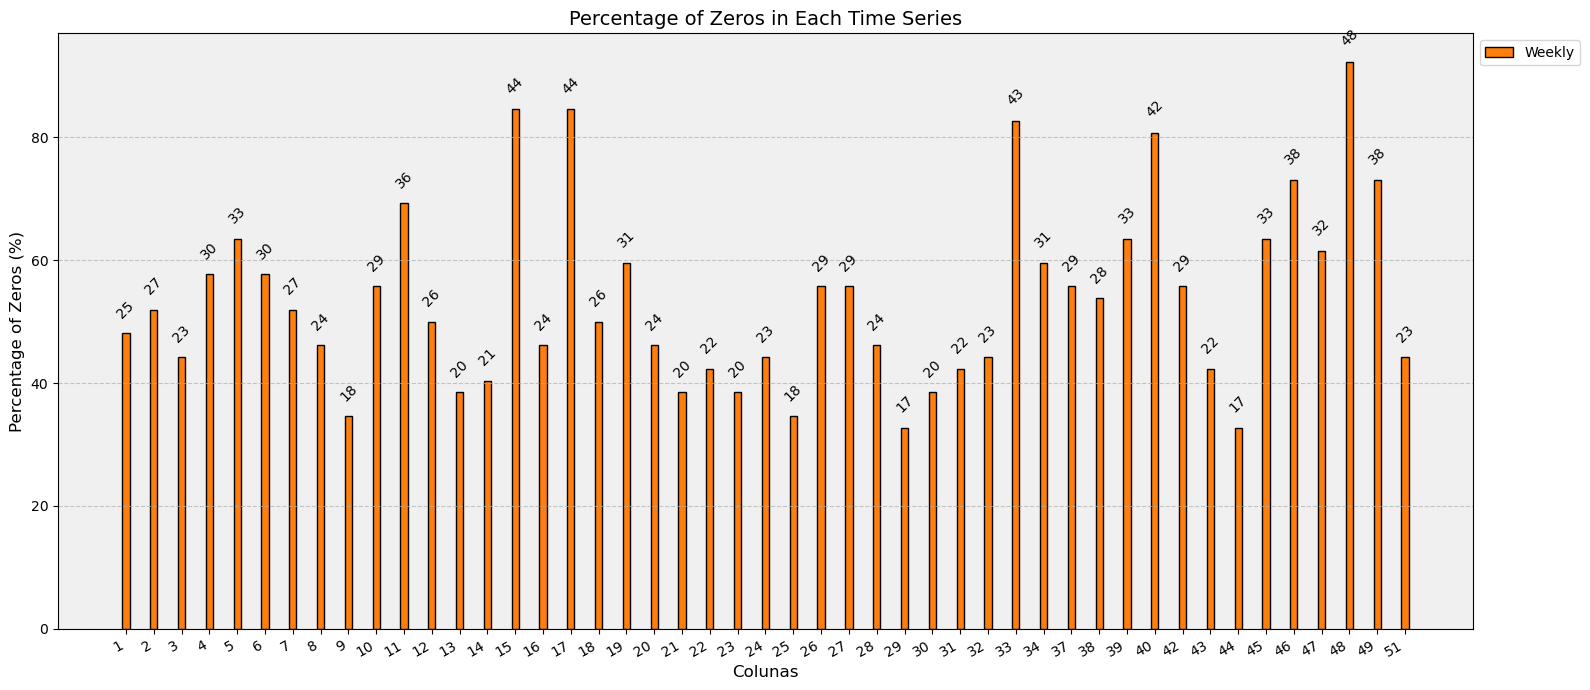

In [6]:
# Function to Calculate Zeros and Percentage
def calculate_zeros_and_percentage(df):
    zeros_count = (df == 0).sum()
    total_count = len(df)  # Total de linhas no DataFrame
    percentage_zeros = (zeros_count / total_count) * 100
    return zeros_count, percentage_zeros

# Calculate for both DataFrames independently
# zeros_count_df1, percentage_zeros_df1 = calculate_zeros_and_percentage(cases_filtered_by_date)
zeros_count_df2, percentage_zeros_df2 = calculate_zeros_and_percentage(cases)

# Define the Bar Width and Spacing
bar_width = 0.35 
spacing = 1  
index = np.arange(len(zeros_count_df2)) * (bar_width + spacing) # Adjust the Position of the Bars

fig, ax = plt.subplots(figsize=(16, 7))

# bars1 = ax.bar(index, percentage_zeros_df1, bar_width, label='Diário', color='#2ca02c', edgecolor='black')

bars2 = ax.bar(index + bar_width, percentage_zeros_df2, bar_width, label='Weekly', color='#ff7f0e', edgecolor='black')

# for i, bar in enumerate(bars1):
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
#             str(int(zeros_count_df1.iloc[i])), 
#             ha='center', va='bottom', fontsize=10, color='black', rotation=45)

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
            str(int(zeros_count_df2.iloc[i])), 
            ha='center', va='bottom', fontsize=10, color='black', rotation=45)

ax.set_title('Percentage of Zeros in Each Time Series', fontsize=14)
ax.set_xlabel('Colunas', fontsize=12)
ax.set_ylabel('Percentage of Zeros (%)', fontsize=12)
ax.set_xticks(index + bar_width)  # Ajustar as posições dos rótulos no eixo x
ax.set_xticklabels(zeros_count_df2.index, rotation=30, ha='right', fontsize=10)  # Inclinar rótulos para 30 graus
ax.legend(fontsize=12)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Grade horizontal

ax.set_facecolor('#f0f0f0')  # Fundo claro para destacar as barras

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


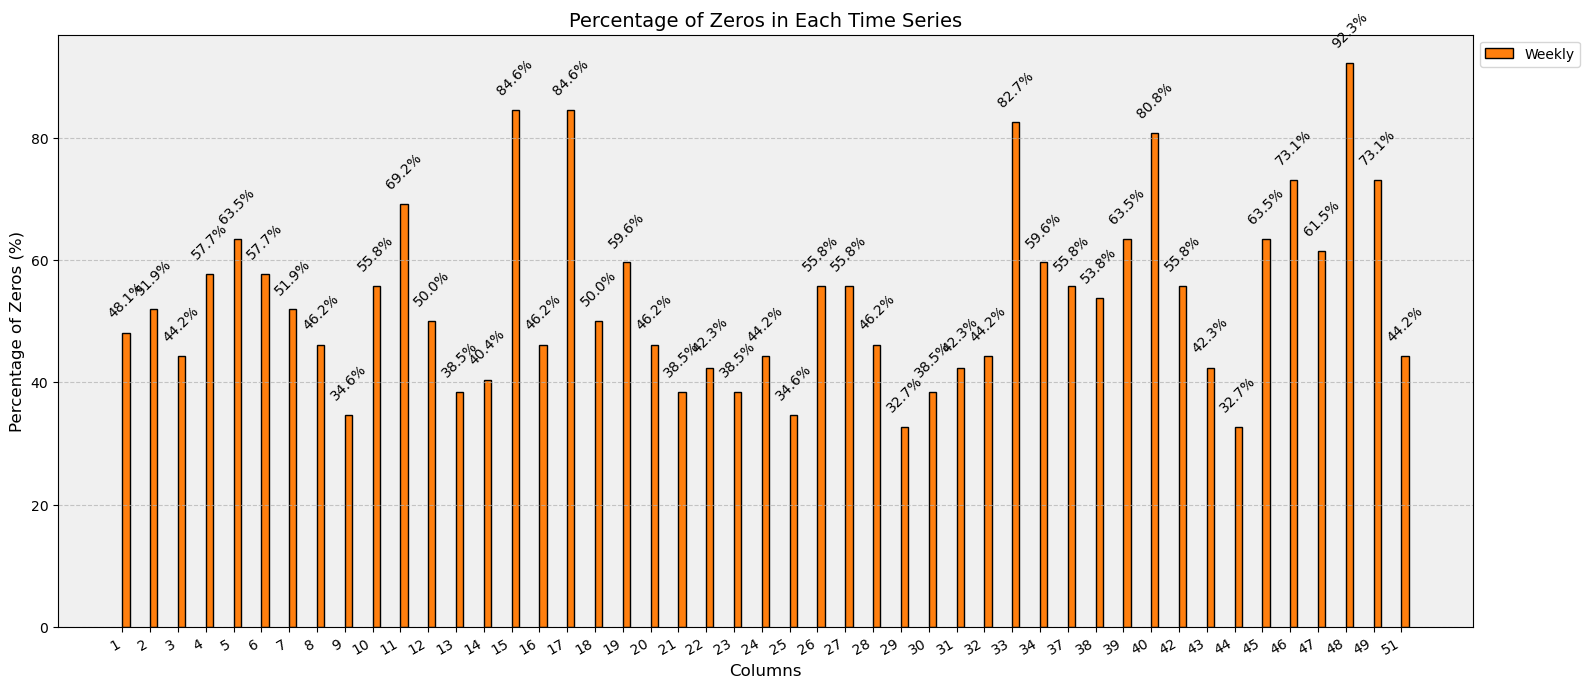

In [8]:
def calculate_zeros_and_percentage(df):
    zeros_count = (df == 0).sum()
    total_count = len(df) 
    percentage_zeros = (zeros_count / total_count) * 100
    return zeros_count, percentage_zeros

# zeros_count_df1, percentage_zeros_df1 = calculate_zeros_and_percentage(cases_filtered_by_date)
zeros_count_df2, percentage_zeros_df2 = calculate_zeros_and_percentage(cases)

bar_width = 0.35 
spacing = 1
index = np.arange(len(zeros_count_df2)) * (bar_width + spacing) 

fig, ax = plt.subplots(figsize=(16, 7))

# bars1 = ax.bar(index, percentage_zeros_df2, bar_width, label='Diário', color='#2ca02c', edgecolor='black')

bars2 = ax.bar(index + bar_width, percentage_zeros_df2, bar_width, label='Weekly', color='#ff7f0e', edgecolor='black')

# for i, bar in enumerate(bars1):
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
#             f'{percentage_zeros_df1.iloc[i]:.1f}%',
#             ha='center', va='bottom', fontsize=10, color='black', rotation=45)

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
            f'{percentage_zeros_df2.iloc[i]:.1f}%',
            ha='center', va='bottom', fontsize=10, color='black', rotation=45)

ax.set_title('Percentage of Zeros in Each Time Series', fontsize=14)
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Percentage of Zeros (%)', fontsize=12)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(zeros_count_df2.index, rotation=30, ha='right', fontsize=10)
ax.legend(fontsize=12)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

ax.set_facecolor('#f0f0f0')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


#### Considering the graphs above, we decided to work with weekly data.

Histogram of Weekly Cases

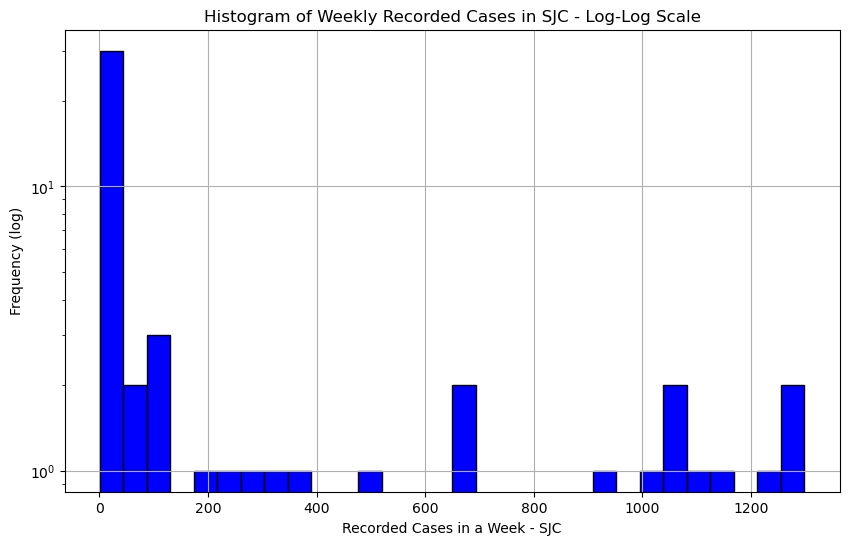

In [9]:
soma_semanal = cases.sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(soma_semanal, bins=30, edgecolor='black', color='blue')

ax = plt.gca()

ax.set_yscale('log')

plt.title('Histogram of Weekly Recorded Cases in SJC - Log-Log Scale')
plt.xlabel('Recorded Cases in a Week - SJC')
plt.ylabel('Frequency (log)')
plt.grid(True)
plt.show()

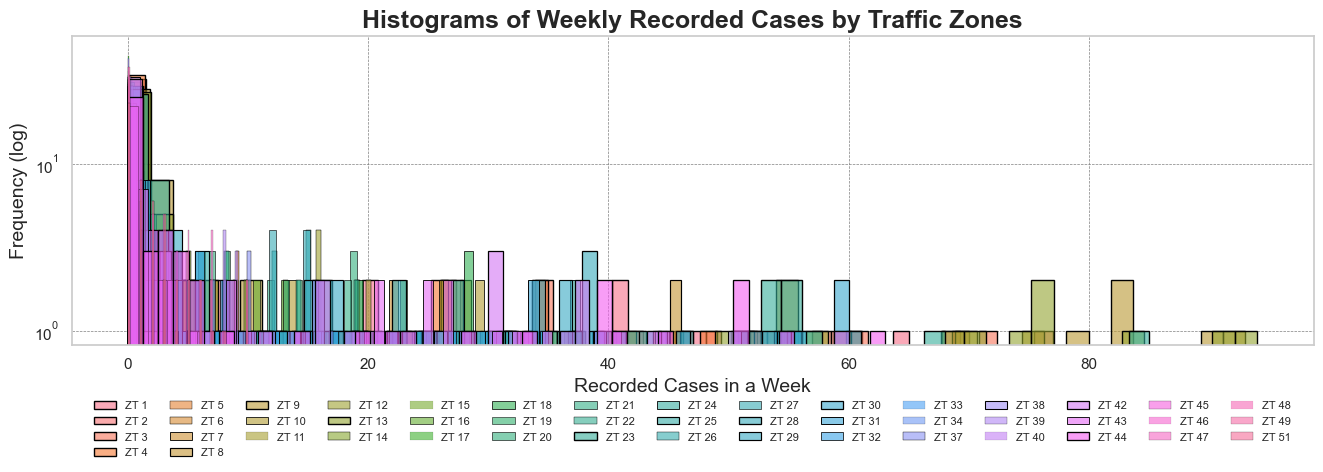

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 5))  # Aumente a largura do gráfico

num_columns = len(cases.columns)
if num_columns <= 20:
    colors = sns.color_palette("tab20", n_colors=num_columns)  # Usa a paleta tab20
else:
    colors = sns.color_palette("husl", n_colors=num_columns)  # Usa uma paleta que gera mais cores

for i, column in enumerate(cases.columns):
    sns.histplot(cases[column], bins=50, color=colors[i], label=f'ZT {column}', kde=False, alpha=0.6, edgecolor='black')

plt.title('Histograms of Weekly Recorded Cases by Traffic Zones', fontsize=18, weight='bold')
plt.xlabel('Recorded Cases in a Week', fontsize=14)
plt.ylabel('Frequency (log)', fontsize=14)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=15, fontsize=8, frameon=False)  # Ajuste ncol para o número de colunas desejado
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax = plt.gca()
ax.set_yscale('log')

plt.tight_layout()
plt.show()


#### Calculating Similarity Matrix with Mutual Information

In [12]:
n = cases.shape[1]
matriz_similaridade_inform_mutua = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            matriz_similaridade_inform_mutua[i, j] = 1.0 
        else:
            info_mutua = mutual_info_regression(cases[[cases.columns[i]]], cases[cases.columns[j]],random_state=42)  # Fixando o random_state para consistência)
            matriz_similaridade_inform_mutua[i, j] = info_mutua[0]

matriz_similaridade_df = pd.DataFrame(matriz_similaridade_inform_mutua, index=cases.columns, columns=cases.columns)

print("Similarity Matrix (Mutual Information):")
matriz_similaridade_df

Similarity Matrix (Mutual Information):


,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
1,1.000000,0.915561,0.852961,0.845205,0.504902,0.353673,0.454567,0.447272,0.324617,0.389204,...,0.093685,0.371761,0.470987,0.575714,0.402525,0.127515,0.324857,0.044823,0.157964,0.011247
2,0.855820,1.000000,0.816266,0.810044,0.591783,0.511821,0.674157,0.506248,0.460986,0.590341,...,0.112519,0.724876,0.618403,0.761566,0.433293,0.284357,0.429887,0.086799,0.291890,0.145147
3,0.827143,0.850004,1.000000,0.911491,0.537721,0.594832,0.686363,0.464102,0.477419,0.596932,...,0.199794,0.741845,0.519398,0.484022,0.455567,0.274585,0.445253,0.226975,0.397856,0.058711
4,0.810248,0.813126,0.815265,1.000000,0.606866,0.445075,0.638938,0.551561,0.439129,0.540831,...,0.103024,0.627146,0.571720,0.618079,0.434137,0.185800,0.385993,0.088867,0.259641,0.034153
5,0.463006,0.610177,0.505758,0.591120,1.000000,0.456451,0.365466,0.410899,0.304448,0.428622,...,0.130592,0.481796,0.481195,0.536312,0.485323,0.324261,0.492115,0.096017,0.235977,0.118442
6,0.380114,0.555500,0.569064,0.481946,0.451104,1.000000,0.675864,0.715046,0.661928,0.541515,...,0.161628,0.712414,0.597872,0.654120,0.334152,0.171018,0.468947,0.087371,0.209336,0.198314
7,0.433415,0.708546,0.652932,0.701220,0.434843,0.635349,1.000000,0.737135,0.551324,0.626556,...,0.162803,0.726643,0.826364,0.666954,0.482536,0.186250,0.514354,0.107691,0.171735,0.112655
8,0.428865,0.516131,0.535067,0.579672,0.463167,0.710768,0.770959,1.000000,0.429065,0.603257,...,0.204720,0.644562,0.296594,0.565080,0.327087,0.121241,0.417401,0.173380,0.321170,0.065762
9,0.379778,0.539140,0.505416,0.451856,0.370925,0.709766,0.588461,0.445171,1.000000,0.738280,...,0.165593,0.662800,0.605838,0.628590,0.429671,0.154162,0.474166,0.170335,0.288005,0.035819
10,0.368464,0.595762,0.534337,0.574223,0.416014,0.553527,0.630693,0.627908,0.700557,1.000000,...,0.200948,0.702241,0.628159,0.652254,0.463881,0.138407,0.405337,0.094395,0.276226,0.038996


In [13]:
matriz_similaridade_df.to_csv('data/weeklycases_mutualinformation.csv')

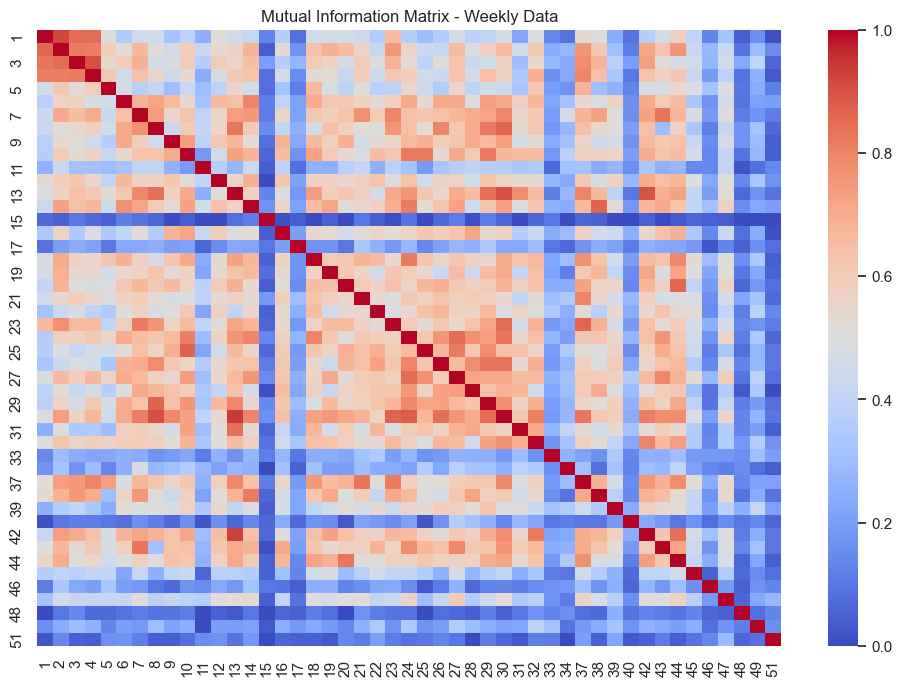

In [14]:
pd.set_option('display.max_columns', None)
informacao_mutua_semanal = matriz_similaridade_df.round(2)
informacao_mutua_semanal

plt.figure(figsize=(12, 8))
sns.heatmap(informacao_mutua_semanal, cmap='coolwarm', cbar=True)
plt.title('Mutual Information Matrix - Weekly Data')
plt.show()

#### Histogram of Mutual Information Values Calculated Between Pairs of Time Series from ZTs

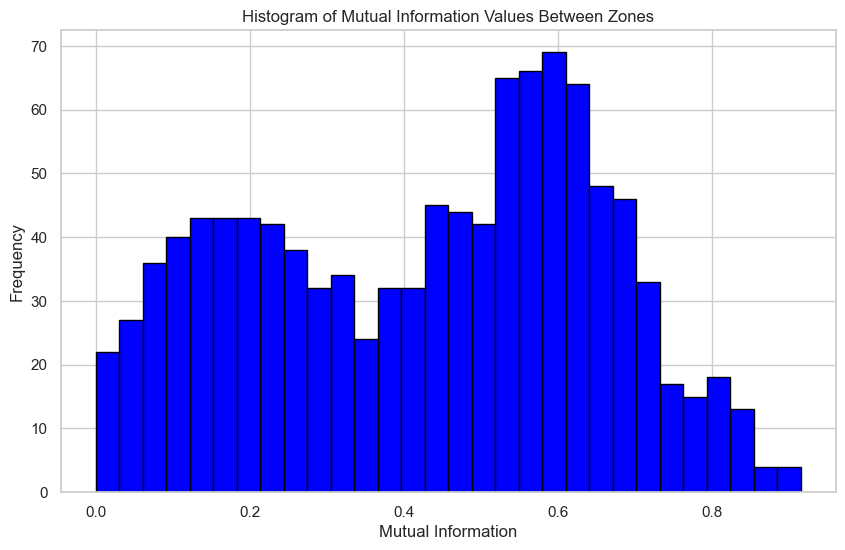

In [15]:
# Step 1: Extract the Values from the Upper Part of the Similarity Matrix
valores_inform_mutua = matriz_similaridade_df.values
valores_superior = valores_inform_mutua[np.triu_indices(n, k=1)]  # k=1 para ignorar a diagonal

# Step 2: Plot the Histogram of Mutual Information Values
plt.figure(figsize=(10, 6))
plt.hist(valores_superior, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Mutual Information Values Between Zones')
plt.xlabel('Mutual Information')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()